In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from io import StringIO
%matplotlib inline

In [ ]:
#Reading the dataset using pandas

covid_dataset = pd.read_csv("/content/Covid_Dataset.csv")
covid_dataset.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03-05-2020,3,1,65,2,0,...,0,0,1,0,0,0,0,0,3,0
1,2,1,2,1,03-06-2020,3,1,72,3,0,...,0,0,1,0,0,1,1,0,5,0
2,2,1,2,2,09-06-2020,1,2,55,3,1,...,0,0,0,0,0,0,0,0,3,1
3,2,1,1,1,12-06-2020,3,2,53,2,0,...,0,0,0,0,0,0,0,0,7,0
4,2,1,2,1,21-06-2020,3,2,68,3,1,...,0,0,1,0,0,0,0,0,3,0


In [ ]:
#covid_dataset.info()

In [ ]:
#Dataset shape to get row and column count
covid_dataset.shape

(199999, 21)

In [ ]:
#Checking for any null values

covid_dataset.isnull().any()

USMER                   False
MEDICAL_UNIT            False
SEX                     False
PATIENT_TYPE            False
DATE_DIED               False
INTUBED                 False
PNEUMONIA               False
AGE                     False
PREGNANT                False
DIABETES                False
COPD                    False
ASTHMA                  False
INMSUPR                 False
HIPERTENSION            False
OTHER_DISEASE           False
CARDIOVASCULAR          False
OBESITY                 False
RENAL_CHRONIC           False
TOBACCO                 False
CLASIFFICATION_FINAL    False
ICU                     False
dtype: bool

In [ ]:
#Using labelencoder to encode the target variable
lb=LabelEncoder()
lb.fit(covid_dataset['DATE_DIED'])
covid_dataset['DATE_DIED']=lb.transform(covid_dataset['DATE_DIED'])


In [ ]:
#Divide the dataset into independent and dependent variables
X=covid_dataset.drop('DATE_DIED',axis=1)
y=covid_dataset['DATE_DIED']


In [ ]:
#Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
covid_dataset=DecisionTreeClassifier(criterion='entropy',splitter='best',max_features=3,max_depth=3)
covid_dataset.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=3)

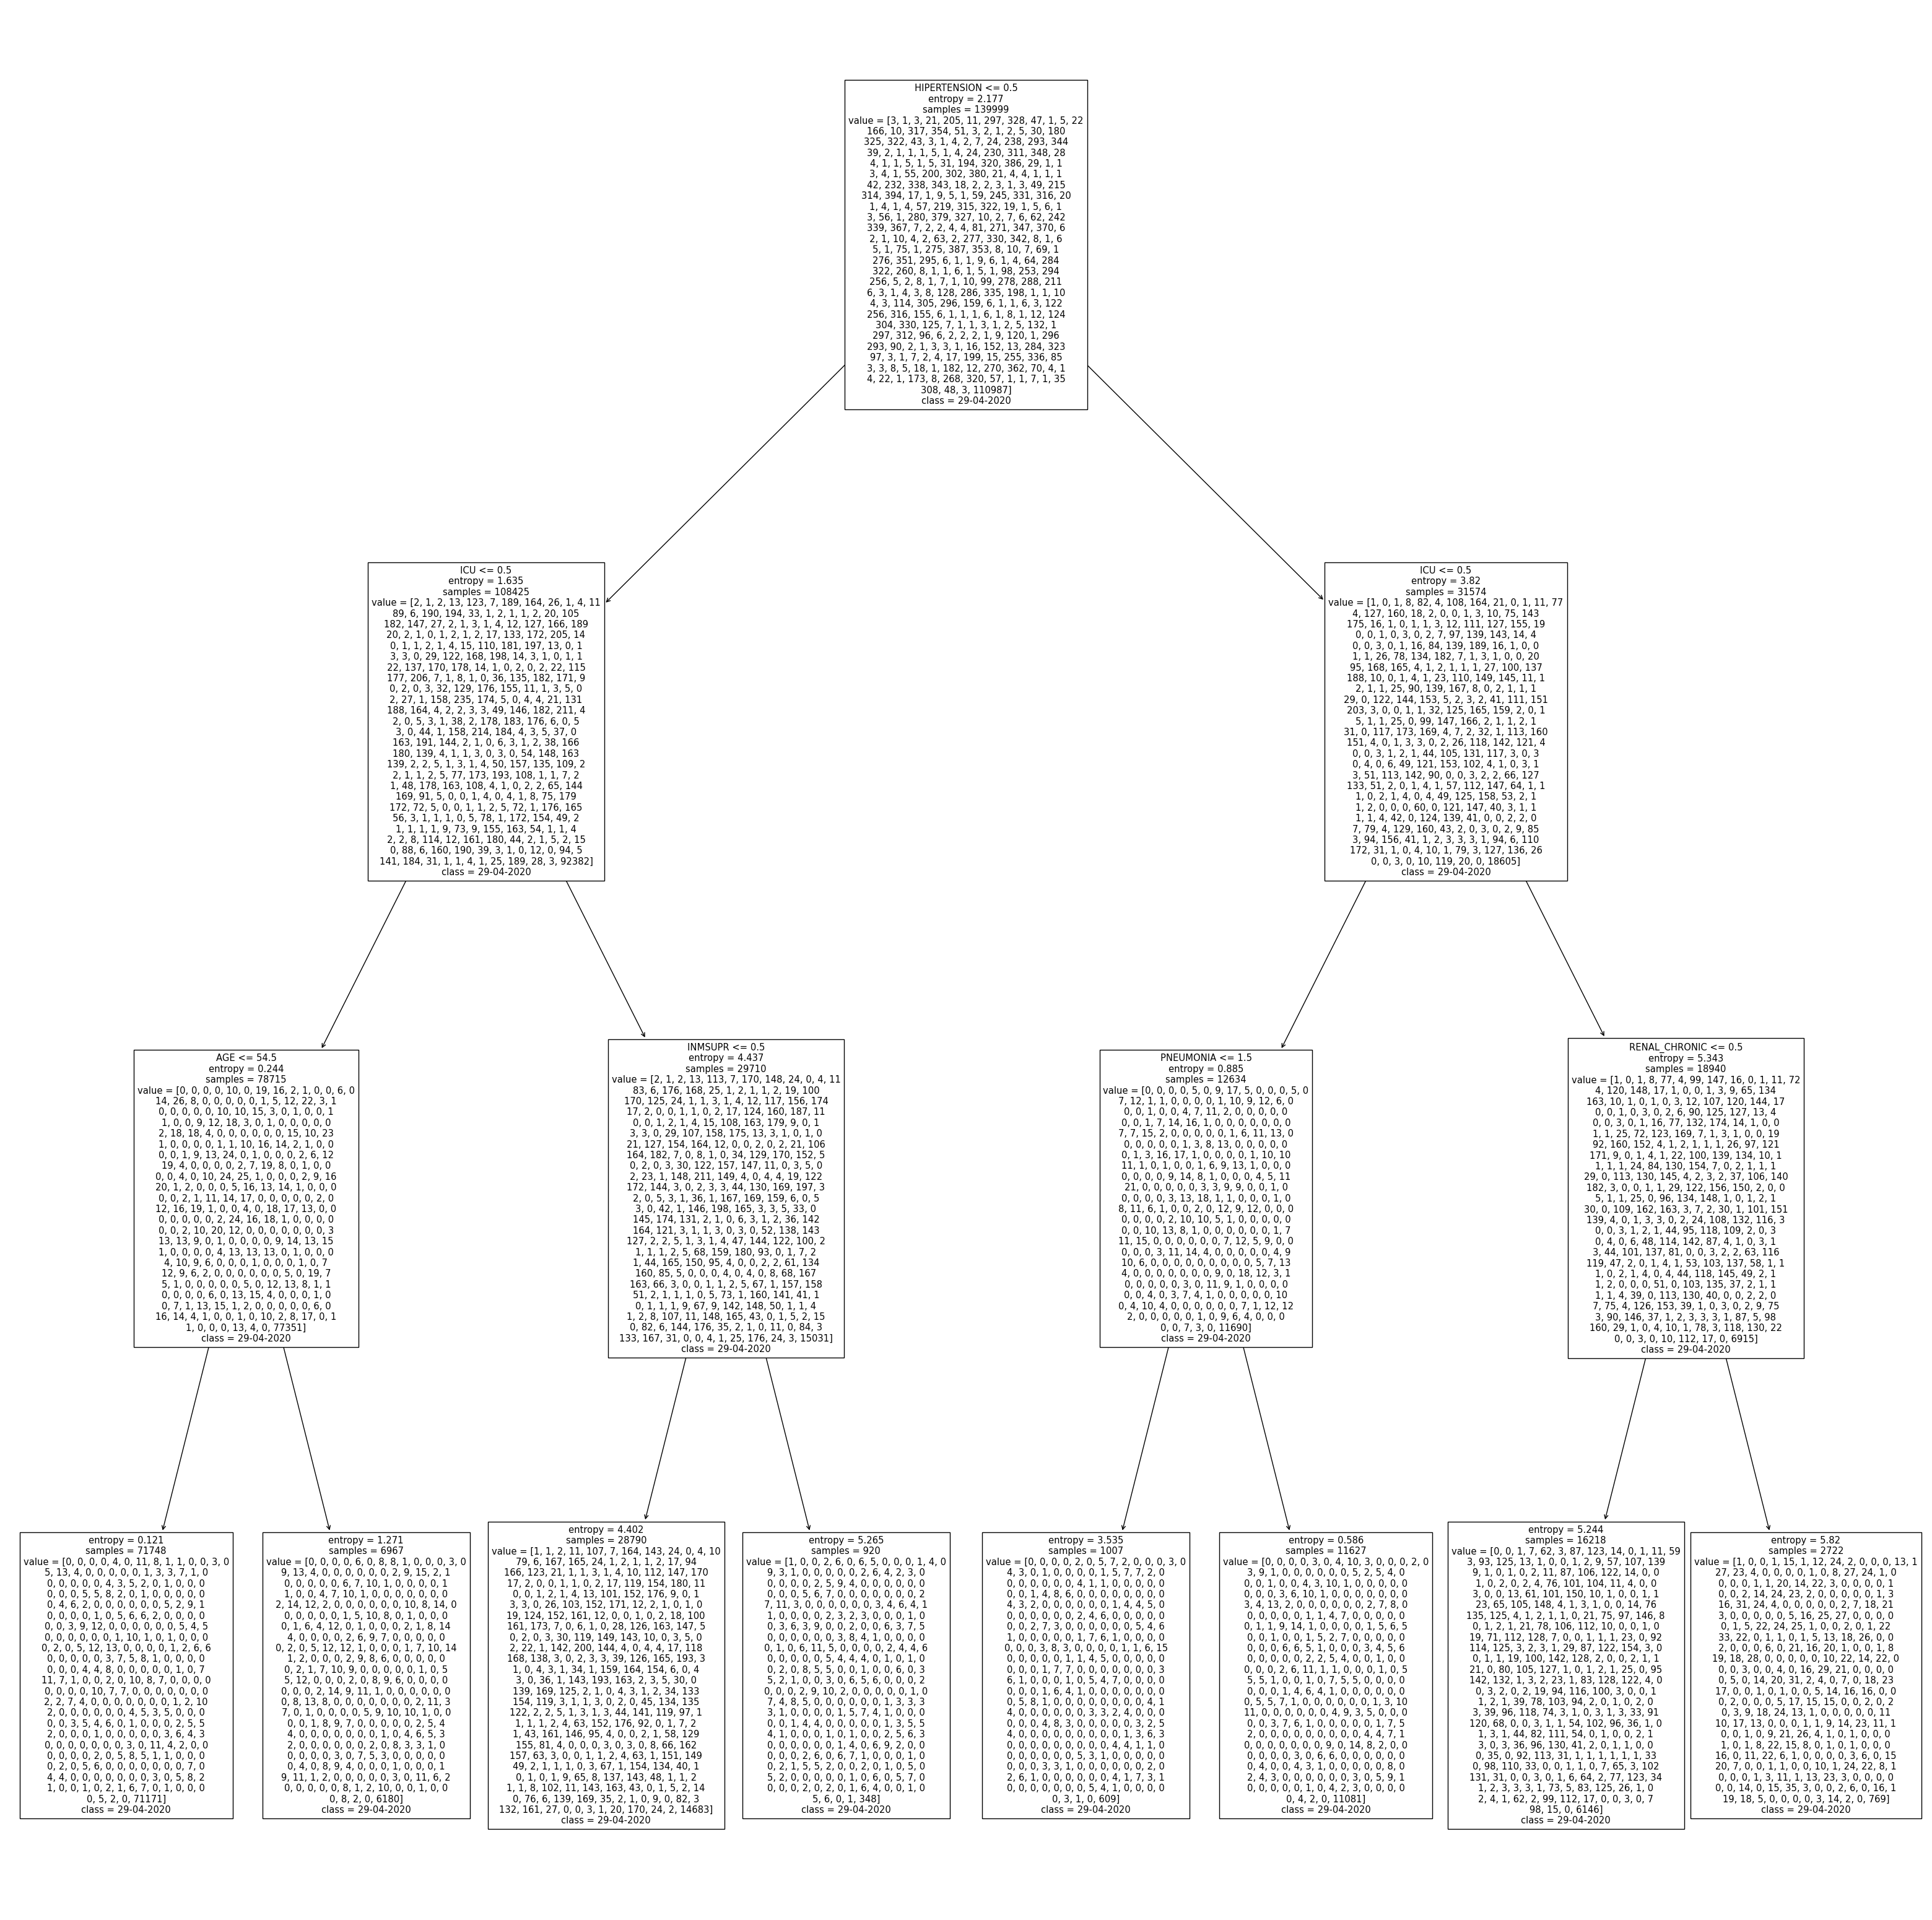

In [ ]:
#plot tree can also be used for visualising the tree
plt.figure(figsize=(40,40))
plot_tree(covid_dataset,class_names=list(lb.classes_),feature_names=list(X_train.columns))
plt.show()

In [ ]:
pred = covid_dataset.predict(X_test)
print('Accuracy is:',accuracy_score(y_test,pred))

Accuracy is: 0.7934166666666667


In [ ]:
features=pd.DataFrame({'Features':X_train.columns,'Importance':np.round(covid_dataset.feature_importances_,3)})
features=features.sort_values('Importance',ascending=False)

features

,Features,Importance
19,ICU,0.775
12,HIPERTENSION,0.157
6,AGE,0.038
5,PNEUMONIA,0.018
16,RENAL_CHRONIC,0.007
11,INMSUPR,0.006
18,CLASIFFICATION_FINAL,0.000
17,TOBACCO,0.000
15,OBESITY,0.000
14,CARDIOVASCULAR,0.000


In [ ]:
rf_covid=RandomForestClassifier(n_estimators=100, criterion='entropy',max_depth=3)
rf_covid.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

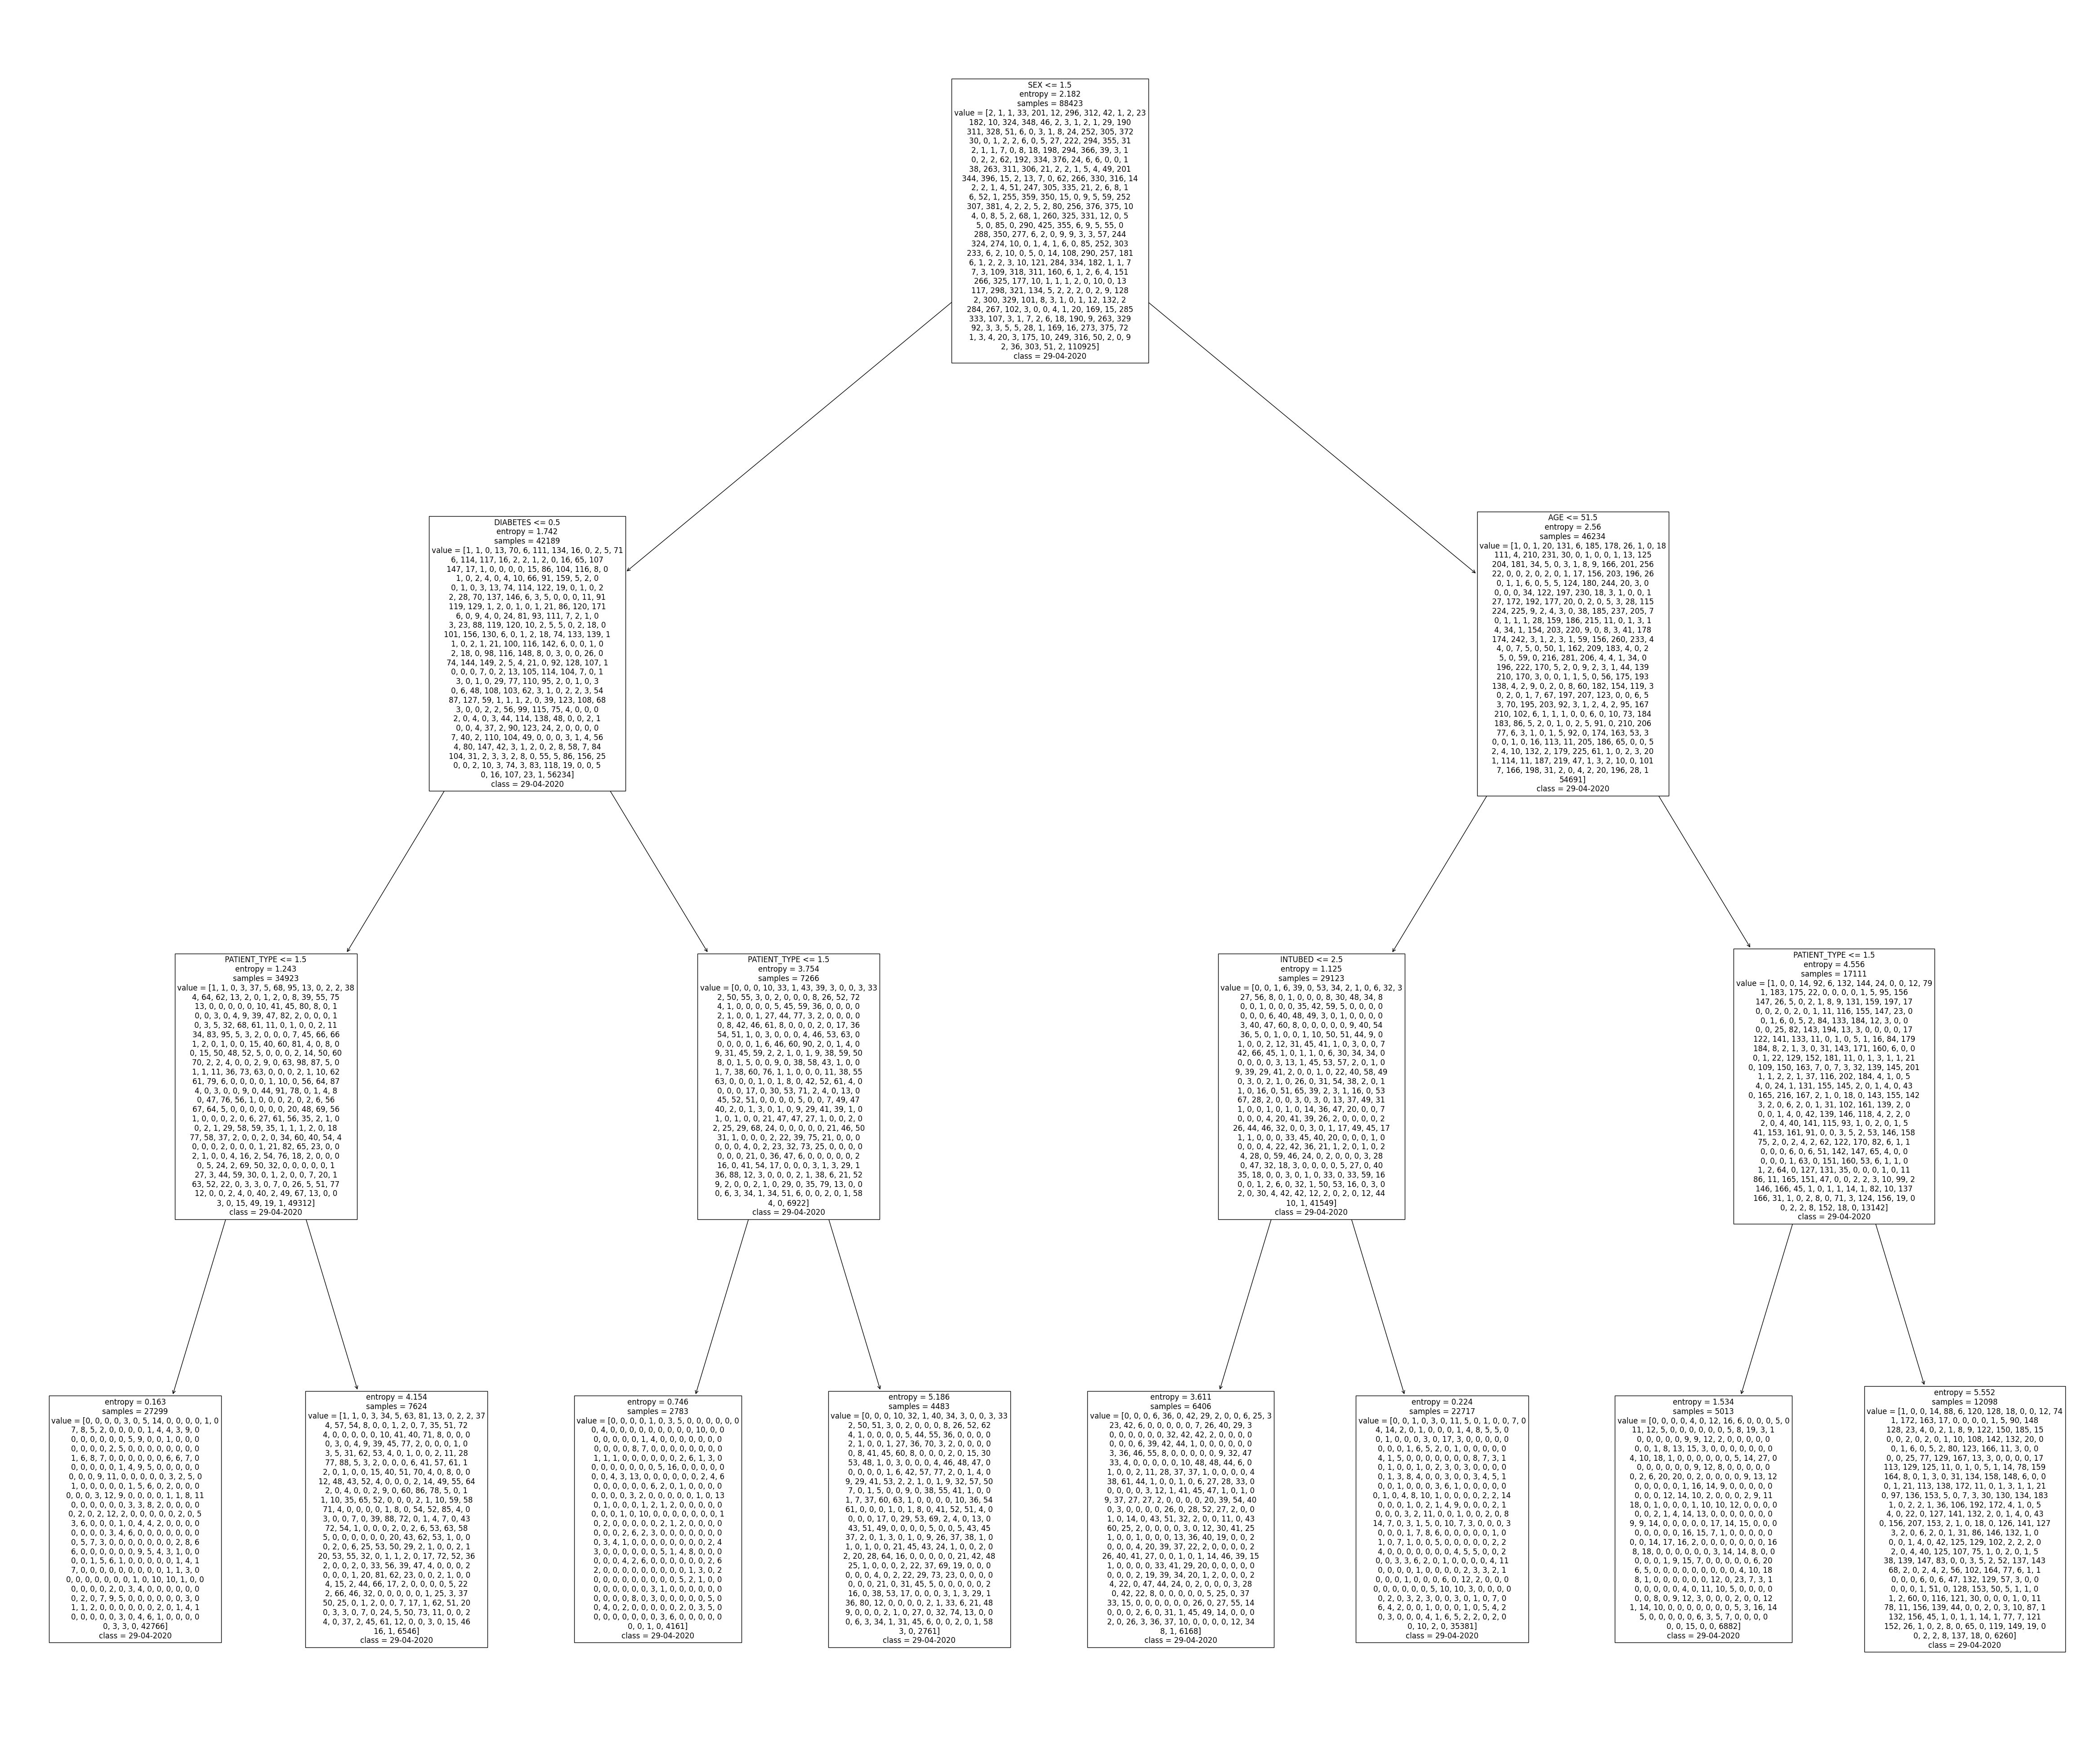

In [ ]:
#Visualing a single estimator
plt.figure(figsize=(60,50))
plot_tree(rf_covid.estimators_[5],feature_names=X_train.columns,class_names=list(lb.classes_),fontsize=12)
plt.show()